## Predicting popular trends
  We made predictions for new post data after extracting the relevant features to match the training data. We performed the prediction using an SVM model trained on new data to identify the trending recipes

In [83]:
import joblib
import pandas as pd

# Load the svm model and scaler of identify trend
loaded_model = joblib.load('svm_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# Load the data
new_data = pd.read_csv('extract_trends.csv')
feature_cols = ['Rating', 'Sentiment', 'Followers', 'NormalizedRating','Number_of_Mentions']


new_data_features = loaded_scaler.transform(new_data[feature_cols])

# Make predictions on the new data
new_data_predictions = loaded_model.predict(new_data_features)


In [84]:
new_data['Predicted_trend'] = new_data_predictions
new_data.head()

,RecipeId,Name,AuthorName_x,DatePublished,Description,Rating,Sentiment,Review,RecipeInstructions,Followers,NormalizedRating,Ingredients,Number_of_Mentions,Predicted_trend
0,76178,Pumpkin and Cornmeal Cake,Elly in Canada,2003-11-11T20:00:00Z,Another great cake from Fine Cooking Magazine....,5,0.587500,Fabulous! I love this cake. It has texture a...,cposition oven rack in middle of oven preheat ...,25,0.671448,"['cunsalted', 'butter', 'granulated', 'sugar',...",16276,0
1,77312,Mixed Greens With Caramelized Pears and Walnuts,PaulaG,2003-11-25T20:01:00Z,Make and share this Mixed Greens With Carameli...,5,0.526389,Wanted to add a note to my 1st review - made t...,cpreheat oven to 400 degrees on a baking sheet...,26,0.676068,"['cwalnuts', 'pears', 'butter', 'sugar', 'whit...",17916,0
2,77907,Sour Cream Pecan-Streusel Muffins,Kittencalrecipezazz,2003-12-04T20:00:00Z,Make and share this Sour Cream Pecan-Streusel ...,5,0.545014,First off let me thank you for posting a wonde...,cset oven to 375 degrees f prepare 12 muffin c...,20,0.675119,"['cpecans', 'butter', 'sugar', 'brown', 'sugar...",15289,0
3,79527,Butterscotch Coffee Cake,Kittencalrecipezazz,2003-12-23T20:00:00Z,This cake has butterscotch/cream cheese bottom...,5,0.544259,This was delicious. Loved the different layer...,cset oven to 350 degrees f grease a 13 x 9 bak...,50,0.675840,"['ccream', 'cheese', 'milk', 'halfandhalf', 'c...",18686,0
4,79982,Dilly Mashed Potatoes,Toby Jermain,2004-01-01T20:00:00Z,Make and share this Dilly Mashed Potatoes reci...,5,0.625000,If you are looking for a creamer and fluffier ...,ccook potatoes in boiling water until done dra...,47,0.667782,"['cpotatoes', 'butter', 'margarine', 'sour', '...",14596,0


In [85]:
trendy_recipes = new_data[new_data['Predicted_trend'] == 1]
trendy_recipes.head()

,RecipeId,Name,AuthorName_x,DatePublished,Description,Rating,Sentiment,Review,RecipeInstructions,Followers,NormalizedRating,Ingredients,Number_of_Mentions,Predicted_trend
7,86165,Sweet Corn Cakes With Avocado Salsa,Latchy,2004-03-08T20:00:00Z,Make and share this Sweet Corn Cakes With Avoc...,5,0.658333,"Latchy, these were great. We ate them as a del...",cplace 2 cups of the corn kernels onion eggs c...,20,0.675119,"['cfresh', 'corn', 'kernels', 'red', 'onion', ...",21830,1
8,86292,Spaghetti Sauce with Meat - Slow Method,Toby Jermain,2004-03-11T20:17:00Z,"This sauce takes most of a day to make, but is...",5,0.647070,This sauce is great!! It does take quite a whi...,cin a small saucepan combine bouillon and rese...,18,0.677847,"['ccondensed', 'beef', 'broth', 'onions', 'gar...",38711,1
17,97222,Carrot Pecan Bars,Olha7397,2004-08-07T19:59:00Z,Flecked with pieces of carrot and laced with l...,5,0.910000,This made very good bars that will be a pleasu...,cpreheat the oven to 350 degrees f lightly but...,18,0.677847,"['cunbleached', 'allpurpose', 'flour', 'whole'...",20291,1
23,105483,Judy's Chili,Judy-Jude,2004-12-06T20:00:00Z,The cardamom and cocoa really gives this chili...,5,0.540675,Perfect! I followed the recipe as written. M...,csaute onion garlic and chiles add ground beef...,26,0.676068,"['colive', 'oil', 'butter', 'margarine', 'onio...",19356,1
28,109414,"Mom's Pumpkin Cake "" Brownies """,Julesong,2005-01-25T20:00:00Z,This year my mom brought to Thanksgiving dinne...,5,0.645679,"These were very, VERY good and moist. very moi...",cpreheat oven to 350 degrees f grease and flou...,49,0.683363,"['cpumpkin', 'puree', 'pumpkin', 'eggs', 'suga...",15934,1


In [86]:
num_rows = trendy_recipes.shape[0]
print(f"The number of rows is {num_rows}")


The number of rows is 44


### Loading the NER model and defining a function to extract food names
the pre-trained Named Entity Recognition (NER) model is loaded and a function to extract food names from text is defined.

In [87]:
import spacy

# Load the pre-trained NER model
nlp = spacy.load('./models/')

In [88]:
# Define a function to extract food names
def extract_food_names(text):
    text=text.replace('-',' ')
    doc = nlp(text)
    food_names=[]
    for ent in doc.ents:
    
        if ent.label_ == 'FOOD':
            food_names.append(ent.text)


    print(food_names)  # this will print the food_names list each time the function is called
    return food_names


In [89]:
# Apply the function to each row of 'Description'
trendy_recipes['Extracted_Food_Names'] = trendy_recipes['RecipeInstructions'].apply(lambda x: extract_food_names(x) if pd.notna(x) else [])


[]
['cin', 'small saucepan combine bouillon and reserved tomato skins and juice', 'optional msg cook', 'italian sausages', 'sharp fork \nplace', 'meatballs sausage slices fresh basil parsley and mushroom mixture to sauce \n', 'big enough pot double the recipe and pack']
['confectioners sugar utill smooth', 'z bar cookies']
['monterey jack cheese heat to boiling and reduce heat to slow simmer cover']
[]
['catsup brown sugar and mustard mix']
['roux \n']
['12x18 jelly roll pan to prepare the cream cheese filling']
['the mushrooms become pale golden', 'large pot of salted water']
['tomato or mushroom would', 'vegetarian version', 'squeezedried packet', 'frozen spinach  and add']
['enameled castiron casserole', 'the tangy corn salsa']
['adobo sauce cilantro salt and sugar and pulse', 'mixed burgers \n', 'turkey cilantro scallion garlic ancho powder salt pepper cumin coriander and cinnamon', 'saran wraped plate light your grill', 'burger on the bottom slice top', 'helping of chipotle salsa'

C:\Users\shira\AppData\Local\Temp\ipykernel_13448\581967479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trendy_recipes['Extracted_Food_Names'] = trendy_recipes['RecipeInstructions'].apply(lambda x: extract_food_names(x) if pd.notna(x) else [])


In [90]:
trendy_recipes.head()

,RecipeId,Name,AuthorName_x,DatePublished,Description,Rating,Sentiment,Review,RecipeInstructions,Followers,NormalizedRating,Ingredients,Number_of_Mentions,Predicted_trend,Extracted_Food_Names
7,86165,Sweet Corn Cakes With Avocado Salsa,Latchy,2004-03-08T20:00:00Z,Make and share this Sweet Corn Cakes With Avoc...,5,0.658333,"Latchy, these were great. We ate them as a del...",cplace 2 cups of the corn kernels onion eggs c...,20,0.675119,"['cfresh', 'corn', 'kernels', 'red', 'onion', ...",21830,1,[]
8,86292,Spaghetti Sauce with Meat - Slow Method,Toby Jermain,2004-03-11T20:17:00Z,"This sauce takes most of a day to make, but is...",5,0.647070,This sauce is great!! It does take quite a whi...,cin a small saucepan combine bouillon and rese...,18,0.677847,"['ccondensed', 'beef', 'broth', 'onions', 'gar...",38711,1,"[cin, small saucepan combine bouillon and rese..."
17,97222,Carrot Pecan Bars,Olha7397,2004-08-07T19:59:00Z,Flecked with pieces of carrot and laced with l...,5,0.910000,This made very good bars that will be a pleasu...,cpreheat the oven to 350 degrees f lightly but...,18,0.677847,"['cunbleached', 'allpurpose', 'flour', 'whole'...",20291,1,"[confectioners sugar utill smooth, z bar cookies]"
23,105483,Judy's Chili,Judy-Jude,2004-12-06T20:00:00Z,The cardamom and cocoa really gives this chili...,5,0.540675,Perfect! I followed the recipe as written. M...,csaute onion garlic and chiles add ground beef...,26,0.676068,"['colive', 'oil', 'butter', 'margarine', 'onio...",19356,1,[monterey jack cheese heat to boiling and redu...
28,109414,"Mom's Pumpkin Cake "" Brownies """,Julesong,2005-01-25T20:00:00Z,This year my mom brought to Thanksgiving dinne...,5,0.645679,"These were very, VERY good and moist. very moi...",cpreheat oven to 350 degrees f grease and flou...,49,0.683363,"['cpumpkin', 'puree', 'pumpkin', 'eggs', 'suga...",15934,1,[]


In [150]:
import ast

# Initialize an empty set
unique_ingredients = set()

# Go through each row in the 'Ingredients' column
for food_names in trendy_recipes['Ingredients']:
    # Convert the string representation of list to actual list
    food_names_list = ast.literal_eval(food_names)
    # Add each food name to the set
    for food_name in food_names_list:
        # Remove leading 'c' from ingredient names
        if food_name.startswith('c'):
            food_name = food_name[1:]
        unique_ingredients.add(food_name.strip())  # strip() removes leading/trailing whitespace

# Convert the set to a list
unique_ingredients_list = list(unique_ingredients)

# List of ingredients to remove
ingredients_to_remove = ['salt', 'pepper', 'sugar', 'of', 'in']

# Remove the ingredients from the list
unique_ingredients_list = [ingredient for ingredient in unique_ingredients_list if ingredient not in ingredients_to_remove]

# Print the list
print(unique_ingredients_list)


['sea', 'dried', 'whipping', 'mozzarella', 'yucca', 'seasoning', 'asparagus', 'steaks', 'sprig', 'paprika', 'hilies', 'evaporated', 'ribs', 'anaheim', 'pasta', 'blue', 'ardamom', 'syrup', 'ricotta', 'virgin', 'beer', 'margarine', 'breast', 'peppercorn', 'spanish', 'egg', 'ucumber', 'boneless', 'hai', 'milk', 'habanero', 'jack', 'ginger', 'salmon', 'paste', 'granulated', 'reamy', 'maytag', 'broth', 'bacon', 'racker', 'urry', 'dijon', 'whole', 'onion', 'noodles', 'links', 'oregano', 'wheat', 'vanilla', 'black', 'love', 'olive', 'kosher', 'leaves', 'spice', 'butter', 'swiss', 'rosemary', 'halfandhalf', 'bell', 'annatto', 'fillets', 'hipotle', 'onions', 'prosciutto', 'atsup', 'hicken', 'ancho', 'tomatoes', 'arrot', 'angel', 'skinless', 'puree', 'flakes', 'round', 'low', 'lowfat', 'unsweetened', 'herbs', 'tortilla', 'scallion', 'hips', 'pecans', 'anise', 'graham', 'fresh', 'avocados', 'buttermilk', 'root', 'hili', 'tagliatelle', 'bittersweet', 'top', 'lightbrown', 'pinto', 'soda', 'yellow',

In [ ]:
new_data

,RecipeId,Name,AuthorName_x,DatePublished,Description,Rating,Sentiment,Review,RecipeInstructions,Followers,NormalizedRating,Ingredients,Number_of_Mentions,Predicted_trend
0,76178,Pumpkin and Cornmeal Cake,Elly in Canada,2003-11-11T20:00:00Z,Another great cake from Fine Cooking Magazine....,5,0.587500,Fabulous! I love this cake. It has texture a...,cposition oven rack in middle of oven preheat ...,25,0.671448,"['cunsalted', 'butter', 'granulated', 'sugar',...",16276,0
1,77312,Mixed Greens With Caramelized Pears and Walnuts,PaulaG,2003-11-25T20:01:00Z,Make and share this Mixed Greens With Carameli...,5,0.526389,Wanted to add a note to my 1st review - made t...,cpreheat oven to 400 degrees on a baking sheet...,26,0.676068,"['cwalnuts', 'pears', 'butter', 'sugar', 'whit...",17916,0
2,77907,Sour Cream Pecan-Streusel Muffins,Kittencalrecipezazz,2003-12-04T20:00:00Z,Make and share this Sour Cream Pecan-Streusel ...,5,0.545014,First off let me thank you for posting a wonde...,cset oven to 375 degrees f prepare 12 muffin c...,20,0.675119,"['cpecans', 'butter', 'sugar', 'brown', 'sugar...",15289,0
3,79527,Butterscotch Coffee Cake,Kittencalrecipezazz,2003-12-23T20:00:00Z,This cake has butterscotch/cream cheese bottom...,5,0.544259,This was delicious. Loved the different layer...,cset oven to 350 degrees f grease a 13 x 9 bak...,50,0.675840,"['ccream', 'cheese', 'milk', 'halfandhalf', 'c...",18686,0
4,79982,Dilly Mashed Potatoes,Toby Jermain,2004-01-01T20:00:00Z,Make and share this Dilly Mashed Potatoes reci...,5,0.625000,If you are looking for a creamer and fluffier ...,ccook potatoes in boiling water until done dra...,47,0.667782,"['cpotatoes', 'butter', 'margarine', 'sour', '...",14596,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,305225,Sauteed Chicken Margherita,CookingONTheSide,2008-05-28T00:28:00Z,Tender chicken breasts get loads of flavor fro...,5,1.000000,This was delicious! I added some cream to the ...,csprinkle chicken with seasoning salt and pepp...,26,0.676068,"['cboneless', 'skinless', 'chicken', 'breast',...",13121,0
216,306770,Bow Tie Pasta Salad With Lentil and Apple,Golden Sunflower,2008-06-02T22:55:00Z,The first time I tried this was at a Pot Luck ...,5,0.533333,My favorite pasta salad! It is so fresh tastin...,cplace lentils and water in sauce pan and simm...,49,0.683363,"['cdried', 'lentils', 'water', 'bow', 'tie', '...",14130,0
217,309669,Herbed Fresh Tomato Soup,Jxenja,2008-06-16T18:39:00Z,"Low-cal, fresh, and fabulous! Wonderful to ma...",5,0.767500,I had a mountain of tomatoes so I made a coupl...,cin a large saucepan cook onion in hot oil unt...,45,0.670846,"['conions', 'olive', 'oil', 'water', 'tomatoes...",15246,0
218,311255,Spicy and Bold Spaghetti Sauce,bolingc,2008-07-02T01:12:00Z,Make and share this Spicy and Bold Spaghetti S...,5,0.577474,This is my go to recipe. My family loves the ...,brown together the first three ingredients and...,47,0.667782,"['cground', 'beef', 'onion', 'garlic', 'powder...",14450,0


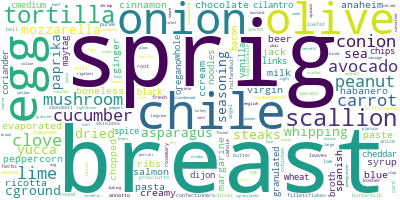

In [145]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(unique_ingredients_list)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

 ### Train a Word2Vec model on a list of food ingredients

In [146]:
import pandas as pd
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')  # for tokenization
from nltk.tokenize import word_tokenize

# Load the data from the Excel file
df = pd.read_csv('Cleaned data/02_Ingredients.csv')


# Convert the food names to lowercase and tokenize them
tokenized_foods = df['Aliased Ingredient Name'].str.lower().apply(word_tokenize)

# Train the Word2Vec model
model = Word2Vec(sentences=tokenized_foods, vector_size=100, window=5, min_count=1, workers=4)

# Save the model
model.save("word2vec.model")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Finding similar ingredients

In [147]:
from gensim.models import Word2Vec

# Load the trained model
model = Word2Vec.load("word2vec.model")


# Find similar ingredients
similar_ingredients = []
for ingredient in unique_ingredients_list:
    # The model might not be familiar with all the ingredients in your list
    if ingredient in model.wv.key_to_index:
        # Find the top 10 ingredients that are most similar to the current ingredient
        # This returns a list of tuples, where each tuple is (similar_ingredient, similarity_score)
        most_similar = model.wv.most_similar(ingredient, topn=10)
        
        # Extract the similar ingredients from the tuples and add them to the list
        similar_ingredients.extend([similar_ingredient for similar_ingredient, _ in most_similar])

# Combine the original list with the list of similar ingredients
extended_ingredient_list = unique_ingredients_list + similar_ingredients

# If you want to remove duplicates
extended_ingredient_list = list(set(extended_ingredient_list))

print(extended_ingredient_list)


['sweetvetch', 'bourbon', 'clupeinae', 'chrysanthemum', 'tangerine', 'asparagus', 'geranium', 'evaporated', 'bread', 'teff', 'muskmallow', 'beer', 'chinook', 'hen', 'pepino', 'lambsquarters', 'sourdough', 'peppercorn', 'paneer', 'woodapple', 'sardine', 'cinnamon', 'boneless', 'mutton', 'garland', 'flower', 'maytag', 'natto', 'horse', 'phyllo', 'spread', 'morchella', 'tobacco', 'links', 'fruits', 'vanilla', 'spice', 'babassu', 'olive', 'sesame', 'cisco', 'blueberry', 'fern', 'clary', 'semolina', 'arrowhead', 'bottlegourd', 'tamarind', 'monkfish', 'annatto', 'striped', 'puree', 'cwhole', 'zealand', 'purslane', 'chia', 'goose', 'champaca', 'norway', 'glutamate', 'purple', 'tagliatelle', 'cgranulated', 'shea', 'lightbrown', 'bittergourd', 'ccarrots', 'mullet', 'colive', 'dandelion', 'yellow', 'garcinia', 'zest', 'spinach', 'peppermint', 'longan', 'sukiyaki', 'comber', 'lovage', 'borage', 'flaxseed', 'pinyon', 'breasts', 'pumpkinseed', 'succotash', 'rose', 'topping', 'hair', 'rotel', 'jicam

In [127]:
import json


with open('extended_ingredient_list.json', 'w') as f:
    json.dump(extended_ingredient_list, f)


In [135]:
from google_trans_new import google_translator  

translator = google_translator()  

# Load data
df = pd.read_csv('database/supermarket data.csv')

# Translate 'תאור' column to English
df['תאור'] = df['תאור'].apply(lambda x: translator.translate(x, lang_tgt='en'))
df.head()


,מק''ט,תאור,Description
0,1.0,פריט כללי,General item
1,103.0,בצל יבש,Dry onion
2,104.0,בצל ירוק,Green onions
3,106.0,ברוקולי ארוז במגש,Broccoli packaged in a tray
4,107.0,גזר ארוז,Packaged carrots
